# Find the optimal parameter $\theta$

Performing 5-fold cross validation for 20 theta values
[============================================================] 100.0% ...

Optimal theta: 14.38
Validation error reduction 0.537
Training error reduction 0.290
Fraction of effective frames  0.735


14.38449888287663

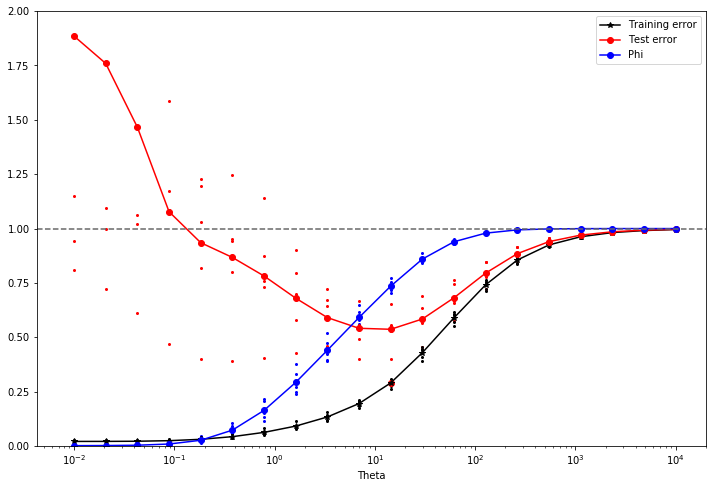

In [3]:
import sys,os
import numpy as np
bme_dir = os.getcwd().split("notebook")[0]
sys.path.append(bme_dir)
import BME as BME

# define input file names
exp_file_1 = "%s/data/couplings_exp.dat" % bme_dir
calc_file_1 = "%s/data/couplings_calc.dat" % bme_dir
exp_file_2 = "%s/data/NOE_exp.dat" % bme_dir
calc_file_2 = "%s/data/NOE_calc.dat" % bme_dir


# initialize. A name must be specified 
rew = BME.Reweight("example_02")

# load the experimental and calculated datasets
rew.load(exp_file_1,calc_file_1)
rew.load(exp_file_2,calc_file_2)

thetas = np.geomspace(0.01,10000,20)
rew.theta_scan(thetas=thetas,nfold=5)



In [7]:
# define input file names
exp_file_1 = "%s/data/saxs310k_bme.txt" % bme_dir
calc_file_1 = "%s/data/calc_saxs.txt" % bme_dir


# initialize. A name must be specified 
rew = BME.Reweight("example_02")

# load the experimental and calculated datasets
rew.load(exp_file_1,calc_file_1,fit="scale+offset")

thetas = np.geomspace(0.1,10000,10)[::-1]
rew.theta_scan(thetas=thetas,nfold=5)

Performing 5-fold cross validation for 10 theta values


KeyboardInterrupt: 